## Simulating data and learning from it

**1. Variable Simulation (You are only allowed to use the numpy library for this section)**

**1.1.** Simulate a vector of shape=(100,1) (i.e. 100 rows and 1 column) where each element $\epsilon_t$ is equal to the realization of a normal random variable with mean 0 and standard deviation 1.  ( $\epsilon_t$ ~ $N(0,1)$)

In [1]:
import numpy as np

**1.2.** Simulate 2 vectors $X^{(1)}$ and $X^{(2)}$ of shape=(100,1) each, where each element is equal to:

$x^{(1)}_t = 0.5 x^{(1)}_{t-1}+\epsilon^{(1)}_t$   Where $\epsilon^{(1)}_t$ ~ $N(0,1)$ and $x^{(1)}_0=0$

$x^{(2)}_t = 0.8 x^{(2)}_{t-1}+\epsilon^{(2)}_t$ Where $\epsilon^{(2)}_t$ ~ $N(0,1)$ and $x^{(2)}_0=0$

Of course, the vectors $X^{(1)}$ and $X^{(2)}$ are:

$X^{(1)}=[x^{(1)}_0, x^{(1)}_1,x^{(1)}_2,...,x^{(1)}_{99}]'$ 

$X^{(2)}=[x^{(2)}_0, x^{(2)}_1,x^{(2)}_2,...,x^{(2)}_{99}]'$ 



In [2]:
# set seed
np.random.seed(42)
steps = 100

# X1
rho1 = 0.5
e1 = np.random.randn(steps)

X1 = list(np.zeros(steps))
X1[:] = map(lambda x, y: rho1*X1[y] + x, list(e1), list(range(steps)))
X1 = np.reshape(X1, (100,1))

# X2
rho2 = 0.8
e2 = np.random.randn(steps)

X2 = list(np.zeros(steps))
X2[:] = map(lambda x, y: rho2*X2[y] + x, list(e2), list(range(steps)))
X2 = np.reshape(X2, (100,1))

**1.3.** Generate the variable $Y=2 X^{(1)}+ 3X^{(2)} + \nu$  Where $\nu_t
$ ~ $N(0,1)$ 


In [3]:
# term v
v = np.random.normal(loc = 0, scale = 1, size = (100, 1))
print(v.shape)

# Set Y variable
Y = 2*X1 + 3*X2 + v

print(Y.shape)

(100, 1)
(100, 1)


**2. Estimation (You are only allowed to use the numpy library for this question)**

**2.1.** Generate a function called `ols_estimator(y,X)` that returns the estimated coefficients $\hat{\beta}$ for the equation $y=X\beta+\upsilon$

In [4]:
def ols_estimator(X, y):
    coefs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return coefs

# set matrix X with one as intercept, X1 and X2 values
X = np.c_[np.ones((100, 1)), X1, X2]

# run the ols estimator
ols_est = ols_estimator(X, Y)
print(ols_est)

[[0.08864867]
 [2.22608936]
 [2.98772322]]


 **3. You are only allowed to use the Scikit-Learn for this question**

**3.1.** Use `sklearn.linear_model.LinearRegression` to estimate and report the oefficients $\hat{\beta}$ for the equation $y=X\beta+\upsilon$

In [5]:
from sklearn.linear_model import LinearRegression

# initialize linear regression
lr = LinearRegression()
lr.fit(X,Y)
lr_coefs = lr.coef_
print(lr_coefs)

[[0.         2.22608936 2.98772322]]


## Dealing with data

**4. For this section, you are only allowed to use pandas or maybe numpy**

Some text files with data from identify people by RENIEC from 2014 through 2020 (pob_identificada_YYYY.txt) will be share to you. Before you begin to answer any question in this section, you have to load these files and consolidate them into a single DataFrame (df)

In [6]:
import pandas as pd
import os

In [7]:
# Open folder path
folder_path = r'C:\\Users\\jerem\\Downloads\\pob_identificada_20\\'
files = os.listdir(folder_path)
print(files)

['pob_identificada_2014.txt', 'pob_identificada_2015.txt', 'pob_identificada_2016.txt', 'pob_identificada_2017.txt', 'pob_identificada_2018.txt', 'pob_identificada_2019.txt', 'pob_identificada_2020.txt']


In [8]:
# Function to import data
def load_reniec_annual_data(filenames):
    df_list = []
    for filename in filenames:
        df = pd.read_csv(folder_path + filename)
        df['YEAR'] = int(''.join(filter(lambda i: i.isdigit(), filename)))  # Add YEAR column
        df_list.append(df)
    df_combined = pd.concat(df_list)
    df_combined
    return df_combined.reset_index(drop=True)

In [9]:
# df
df = load_reniec_annual_data(files)
print(f"Number of row/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

C:\Users\jerem\AppData\Local\Temp/ipykernel_3308/3528459954.py:2: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  df = load_reniec_annual_data(files)
C:\Users\jerem\AppData\Local\Temp/ipykernel_3308/3528459954.py:2: DtypeWarning: Columns (5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  df = load_reniec_annual_data(files)


Number of row/records: 2726214
Number of columns/variables: 12


,RESIDENCIA,UBIGEO_RENIEC,UBIGEO_INEI,CONTINENTE,PAIS,DEPARTAMENTO,PROVINCIA,DISTRITO,SEXO,EDAD,CANTIDAD,YEAR
0,Nacional,10101,10101,América,Perú,Amazonas,Chachapoyas,Chachapoyas,Hombre,0,315,2014
1,Nacional,10101,10101,América,Perú,Amazonas,Chachapoyas,Chachapoyas,Hombre,1,337,2014
2,Nacional,10101,10101,América,Perú,Amazonas,Chachapoyas,Chachapoyas,Hombre,2,311,2014
3,Nacional,10101,10101,América,Perú,Amazonas,Chachapoyas,Chachapoyas,Hombre,3,302,2014
4,Nacional,10101,10101,América,Perú,Amazonas,Chachapoyas,Chachapoyas,Hombre,4,276,2014


In [10]:
# Missing values
print(df.isnull().sum().sort_values(ascending=False))
print("\n NA values")
print(df[df['UBIGEO_INEI'].isna()]['YEAR'].value_counts())

UBIGEO_INEI      75968
DEPARTAMENTO     75968
PROVINCIA        75968
DISTRITO         75968
UBIGEO_RENIEC     9805
RESIDENCIA           0
CONTINENTE           0
PAIS                 0
SEXO                 0
EDAD                 0
CANTIDAD             0
YEAR                 0
dtype: int64

 NA values
2019    66163
2020     9805
Name: YEAR, dtype: int64


**4.1.** How many nonresident male were identified from 2018 through 2019?

In [11]:
# Non resident male group
non_res_male_2018_2019 = df.loc[(df['RESIDENCIA'] == 'Extranjero') & (df['SEXO'] == 'Hombre') & (df['YEAR'].isin([2018,2019]))]

print(f"There are {non_res_male_2018_2019['CANTIDAD'].sum()} male non residents from 2018 to 2019")

There are 953841 male non residents from 2018 to 2019


**4.2.** From 2016 through 2018 and in the department of Arequipa. What percentage of women represent female teenagers? [Hint: a teenager is a person whose age is between 10 to 19 years]

In [12]:
# Women and teenager groups
women_2016_2018 = df.loc[(df['DEPARTAMENTO'] == 'Arequipa') & (df['SEXO'] == 'Mujer') & (df['YEAR'].isin([2016,2017,2018]))]
teenager_2016_2018 = df.loc[(df['DEPARTAMENTO'] == 'Arequipa') & (df['SEXO'] == 'Mujer') & (df['YEAR'].isin([2016,2017,2018])) & (df['EDAD'].between(10, 19, inclusive = 'both'))]

# Percentage of women who are teenagers
percent_teenagers = pd.DataFrame()
percent_teenagers['Teenagers'] = teenager_2016_2018.groupby('YEAR')['CANTIDAD'].sum()
percent_teenagers['Women'] = women_2016_2018.groupby('YEAR')['CANTIDAD'].sum()
percent_teenagers['% Teenagers'] = round(percent_teenagers['Teenagers'] * 100 / percent_teenagers['Women'], 1)

# Print response
display(percent_teenagers)
print(f"Overall, female teenagers represent the {round(teenager_2016_2018['CANTIDAD'].sum() *100 / women_2016_2018['CANTIDAD'].sum(), 1)}% of women in Arequipa from 2016 through 2018")

,Teenagers,Women,% Teenagers
YEAR,,,
2016,108458,731554,14.8
2017,108920,746625,14.6
2018,110037,757638,14.5


Overall, female teenagers represent the 14.6% of women in Arequipa from 2016 through 2018


**4.3.** From 2014 through 2020, which year the average age of elderly people (age equal or greather than 60 years) identified was the higher?

In [13]:
# Elderly people
elderly_people = df.loc[df['EDAD'] >= 60]
elderly_people['EDAD x CANTIDAD'] = elderly_people['EDAD'] * elderly_people['CANTIDAD']
#elderly_people

# Average age of elderly people
avg_elderly = pd.DataFrame()
avg_elderly['No. Elderly People'] = elderly_people.groupby('YEAR')['CANTIDAD'].sum()
avg_elderly['Avg Age'] = round(elderly_people.groupby('YEAR')['EDAD x CANTIDAD'].sum() / avg_elderly['No. Elderly People'], 2)
avg_elderly = avg_elderly.sort_values(by = 'Avg Age', ascending = False)

avg_elderly

display(avg_elderly)
print("\n The average age of elderly people was higher in 2018")

C:\Users\jerem\AppData\Local\Temp/ipykernel_3308/1332363191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elderly_people['EDAD x CANTIDAD'] = elderly_people['EDAD'] * elderly_people['CANTIDAD']


,No. Elderly People,Avg Age
YEAR,,
2018,4157315,70.59
2019,4345703,70.58
2017,3997698,70.57
2020,4476733,70.54
2016,3848590,70.53
2015,3681472,70.49
2014,3514966,70.47



 The average age of elderly people was higher in 2018


**4.4** Please show the top 5 cities with highest average age both males and females

In [14]:
# men and women groups
men = df.loc[df['SEXO'] == 'Hombre']
women = df.loc[df['SEXO'] == 'Mujer']

# create new column in men group
men['EDAD x CANTIDAD'] = men['EDAD'] * men['CANTIDAD']

# Average age of elderly people
avg_men = pd.DataFrame()
avg_men['Total men'] = men.groupby('DEPARTAMENTO')['CANTIDAD'].sum()
avg_men['Avg Age'] = round(men.groupby('DEPARTAMENTO')['EDAD x CANTIDAD'].sum() / avg_men['Total men'], 2)
avg_men = avg_men.sort_values(by = 'Avg Age', ascending = False)

# create new column in women group
women['EDAD x CANTIDAD'] = women['EDAD'] * women['CANTIDAD']

# Average age of elderly people
avg_women = pd.DataFrame()
avg_women['Total women'] = women.groupby('DEPARTAMENTO')['CANTIDAD'].sum()
avg_women['Avg Age'] = round(women.groupby('DEPARTAMENTO')['EDAD x CANTIDAD'].sum() / avg_women['Total women'], 2)
avg_women = avg_women.sort_values(by = 'Avg Age', ascending = False)

display(avg_men.iloc[1:6])
print("\n")
display(avg_women.iloc[1:6])

C:\Users\jerem\AppData\Local\Temp/ipykernel_3308/2509590050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men['EDAD x CANTIDAD'] = men['EDAD'] * men['CANTIDAD']
C:\Users\jerem\AppData\Local\Temp/ipykernel_3308/2509590050.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['EDAD x CANTIDAD'] = women['EDAD'] * women['CANTIDAD']


,Total men,Avg Age
DEPARTAMENTO,,
Moquegua,677428,33.96
Arequipa,5288014,32.32
Lima,37979882,32.31
Tacna,1306802,32.04
Áncash,4332095,31.71


,Total women,Avg Age
DEPARTAMENTO,,
Moquegua,654832,33.76
Lima,38174585,33.42
Arequipa,5197462,33.12
Áncash,4304494,32.66
Callao,3852967,32.59


**4.5.** Please, test whether the average ages of women and men are statistically different. Prove it with python
###### hint: You could plot a histogram to explain your idea.

In [15]:
import matplotlib.pyplot as plt

df.groupby(by = ['SEXO']).agg({'EDAD': ['mean', 'median', 'std']})

EDAD                  
             mean median        std
SEXO                               
Hombre  46.271548   46.0  27.110814
Mujer   47.025492   46.0  27.553558

<AxesSubplot:ylabel='Density'>

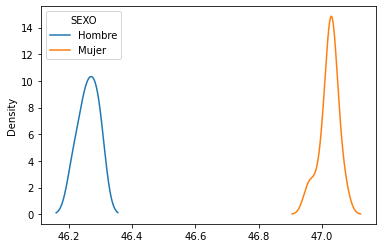

In [16]:
# Creating an list with bootstrapped means for each group
boot_1d = []
for i in range(10):
    boot_mean = df.sample(frac = 1, replace = True).groupby('SEXO')['EDAD'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind = 'kde')

Text(0.5, 0, '% difference in means')

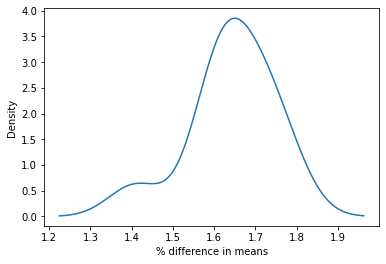

In [17]:
# Zoom in on the difference

# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['Mujer'] - boot_1d['Hombre']) / boot_1d['Hombre'] * 100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind = 'kde')
ax.set_xlabel('% difference in means')

In [18]:
import scipy.stats as stats

test = stats.ttest_ind(men['EDAD'], women['EDAD'])
test

Ttest_indResult(statistic=-22.76935644295718, pvalue=9.460286185227221e-115)

The p-value is lower than 0.05 thus there is strong evidence of statitistical difference between men and women based on average age.